# Processus Markov & Applications: Jumping Electrons Model

## Introduction

This work you are about to read focuses on the application of Markov processes to atomic chemistry, particularly in the study of the first 10 elements of the Periodic Table. Markov processes, known for their memoryless property, provide a valuable tool for modeling the stochastic behaviour observed in atomic interactions and electron movements. By applying these processes, we aim to gain insights into the underlying mechanisms of atomic behaviour, enhancing our ability to predict outcomes in chemical reactions and interactions. The study emphasizes the modeling and simulation of electron transitions and atomic state changes within these elements, utilizing Markov models to quantify and predict probabilistic outcomes in atomic and molecular chemistry.

## Limits of this work

In this presentation, we acknowledge the simplifications made in the context of quantum mechanics and electron behaviour within atoms. Classical quantum mechanics has established that electron positions within an atom cannot be precisely determined; rather, we can only calculate the probability of an electron's presence in a given region of space. This fundamental principle stems from the Heisenberg Uncertainty Principle and the wave-particle duality nature of electrons, which defy classical interpretations of discrete positions and trajectories.

Moreover, the atomic space where electrons reside, commonly referred to in simplified models as 'shells', cannot be accurately described as discrete layers. In reality, electrons exist in a state of probability clouds or orbitals that are solutions to the Schrödinger equation for the hydrogen atom and approximations thereof for multi-electron atoms. These orbitals represent regions in space where the probability of finding an electron is highest, and the concept of an electron 'jumping' from one shell to another is a considerable simplification of quantum transitions that involve changes in these probabilistic states.

However, for the purposes of our project and considering that we have not reviewed accurate theory for continuous space processes, we adopt a simplified model that allows us to apply Jump Markov Processes to atomic systems. By doing so, we can explore and potentially prove interesting results within the scope of this applied model, while fully acknowledging that this approach abstracts away much of the complexity and nuance of true atomic behaviour. Our model assumes discrete states for electron configurations and simplifies electron transitions between these states to observable 'jumps' governed by predefined probabilities and criteria. These simplifications enable the application of Markov processes but are a departure from the continuous and probabilistic nature of quantum mechanics.

To address these simplifications and the resultant limitations, we include a specific chapter that delves into the derivation of our simplified rules for electron transitions. This chapter aims to provide a transparent basis for our model's assumptions, making it clear how and why we abstract certain quantum mechanical complexities for the sake of tractability  within the realm of Markov Process applications.

In summary, while our model simplifies the intricate quantum mechanical underpinnings of atomic behaviour, it serves as a tool for illustrating the application of Jump Markov Processes to systems that, at a more granular level, are governed by the principles of quantum mechanics and probabilistic electron distributions.

Here, to visualise very clearly the kind of model we are dealing with, we show a picture of an Oxygen atom with 8 protons and 8 neutrons in a state (2,6) (meaning that it has 2 and 6 electrons respectively in the first and in the second shell, its most stable condition). 

## Oxygen (8,8) with state (2,6)

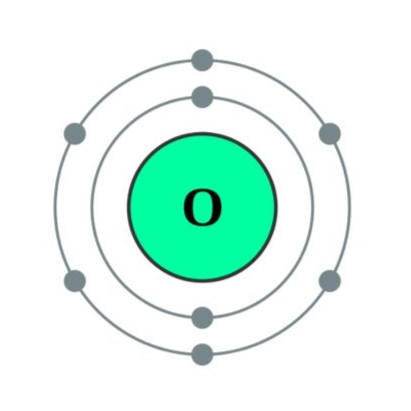

In [1]:
from IPython.display import Image, display, Markdown

# Specify the file path to the image
image_path = r'C:\Users\Marco Plazzogna\Desktop\MAGISTRALE\PRIMO ANNO\SECONDO SEMESTRE\PROBABILITY 2\project\oxygen.jpg'

# Display a Markdown title
display(Markdown("## Oxygen (8,8) with state (2,6)"))

# Display the image
display(Image(filename=image_path))

## Notation for the model
Let's define the symbols used in the probability calculations for the AtomModel:

- Let $A = \{ 0, 1, 2 \} \times \{ 0, 1, ..., 8 \}$ be the finite and countable space.
- Let $\text{N}_{\text{p}}$ denote the number of protons in the atom.
- Let $\text{N}_{\text{n}}$ denote the number of neutrons in the atom.
- The stability condition of electrons, $\text{N}_{\text{stab}}$, is calculated as $\text{N}_{\text{stab}} = \lfloor \frac{\text{N}_{\text{p}} + \text{N}_{\text{n}}} {2} \rfloor$. Overall, $\text{N}_{\text{stab}} = \{ 0, 1, ..., 10 \}$. Many time in the project it will also be referred as $(k)$.
- Let $\text{e}_{i}^{1}$ and $\text{e}_{i}^{2}$ denote the number of electrons in the first and second shells, respectively, at time i.
- $\mathbb{P}^{\text{(k)}}$ represents the probability given the stability condition $k$.
- $\mathbb{P}_{\text{j}}$ represents the probability for action $j$, where $j$ can be:
  - $0$: Moving an electron up from the first to the second shell.
  - $1$: An electron escaping from the system (specifically from the second shell).
  - $2$: Moving an electron down from the second to the first shell.
  - $3$: Adding a new electron to the system (specifically to the second shell).

## Markov Models in Atomic Chemistry

In this section, we delve into a simplified model using Jump Markov Processes to simulate electron transitions between the first two electron shells. This approach allows us to specifically examine the behavior of electrons across the first 10 elements of the Periodic Table, where electron configurations do not exceed 10 electrons—correspondingly, a maximum of 2 electrons in the first shell and 8 in the second shell.

We will further outline the theoretical framework and mathematical foundations of the Jump Markov Processes utilized in our study. This background provides a basis for understanding how these processes are applied to describe electron behavior in atomic systems, offering insights into the probabilistic nature of atomic interactions and the resultant chemical phenomena.

## Model Rules Overview (check methods)

This section delineates the foundational rules we've applied to our model, with a focus on atomic stability, electron transitions, and timing of events.

### Atomic Stability Condition

For the initial ten elements, we propose that an atom's stable electron count equals the smallest integer resulting from the sum of its protons and neutrons divided by two. This count aligns most of the times with the element's atomic number (e.g., Oxygen has 8, Carbon has 6); this is not necessarily true in general, but it is a reasonable assumption for the first 10 atoms of the Periodic Table. This stability criterion serves as a cornerstone for understanding electron dynamics within our model.

### Electron Dynamics

With the stability condition as a backdrop, we explore scenarios involving electron ingress or egress and transitions between the atom's first and second shells. Given the maximum occupancy of 2 and 8 electrons in the first and second shells, respectively, the system's actions are constrained by its current electron count:

- **At Maximum Capacity**: No additional electrons can be accommodated; the system's probable and only action is electron loss.
- **Without Electrons**: The sole action is to attract an electron, which initially occupies the second shell before potentially moving to the first.

### Electron Transitions

In scenarios other than the extremes, both the likelihood of gaining or losing electrons and their transition between shells are influenced by the atom's current electron count versus its stability condition. Key assumptions include:

- Electrons prioritize occupying the first shell, transitioning from the second if necessary to achieve stability.
- Electrons may move from the first to the second shell, though less likely, to accommodate incoming electrons or as part of reaching stability.
- All actions are primarily guided by the desire to achieve or maintain the stability condition, facilitating transitions across any state with a non-zero probability.

The probabilities are defined in the following way, so they can follow the rules that we just mentioned:
\begin{align*}
\mathbb{P}^{\text{(k)}}_{\text{i}} (\text{X}_{\text{t}} = (\text{e}_{\text{t}}^{1}, \text{e}_{\text{t}}^{2}) \mid \text{X}_{0} = (\text{e}_{0}^{1}, \text{e}_{0}^{2})) = \frac{w^{(k)}_i (\text{e}^{1}_{0}, \text{e}^{2}_{0})}{\sum_{j=0}^{3} w^{(k)}_j (\text{e}^{1}_{0}, \text{e}^{2}_{0})} \qquad \quad \forall i = 0, 1, 2, 3
\end{align*}

with 

$$
w^{(k)}_i (\text{e}^{1}, \text{e}^{2}) = 
\begin{cases} 
max\{1, 8 - (\text{e}^{1} + \text{e}^{2})\} \times \mathbf{1}_{\text{e}^{1} \neq 0} \times \mathbf{1}_{\text{e}^{2} \neq 8} & \text{if} \; \, i=0 \quad \text{(an electron moves from the first to the second shell)} \\
\text{e}^{2} &  \text{if} \; \, i=1 \quad \text{(an electron from the second shell gets out of the systen)} \\
(2 - \text{e}^{1}) \times (\text{e}^{1} + \text{e}^{2}) \times \mathbf{1}_{\text{e}^{2} \neq 0} &  \text{if} \; \, i=2 \quad \text{(an electron moves from the second to the first shell)} \\
k \times \mathbf{1}_{\text{e}^{2} \neq 8} + \mathbf{1}_{\text{e}^{1} + \text{e}^{2} = 0} &  \text{if} \; \, i=3 \quad \text{(a new electron gets addes into the system in the second shell)}
\end{cases}
$$

and 

$$
k := \text{stability condition} = 0, ..., 10
$$

To simplify the heavy notation we propose the following definitions:

\begin{align*}
\text{e}_{t} : = (\text{e}_{t}^{1}, \text{e}_{t}^{2}) , \qquad \text{P}^{\text{(k)}}_{\text{t}} (\text{e}_{0}, \text{e}_{t}) := \mathbb{P}^{\text{(k)}} (\text{X}_{\text{t}} = (\text{e}_{\text{t}}^{1}, \text{e}_{\text{t}}^{2}) \mid \text{X}_{0} = (\text{e}_{0}^{1}, \text{e}_{0}^{2}))
\end{align*}

### Timing of Events

Event timing in our model isn't governed by a fixed rate but varies with the system's state, aiming for a rapid convergence to stability and resilience once equilibrium is achieved. The determination of $\lambda$, the rate parameter for the model's exponential timing distribution, depends on the atomic state:

- **At Stability**: $\lambda_{\text{stab}} = \frac{1} {\text{N}_{\text{stab}}}$
- **Otherwise**: $\lambda_t = |\text{N}_{\text{stab}} - (\text{e}_{t}^{1} + \text{e}_{t}^{2})|$

This dynamic approach to defining $\lambda$ ensures that our model efficiently reaches and maintains atomic stability, but without staying forever in one state, reflecting the probabilistic nature of electron behaviors and interactions. 

### Implementation (actual part to complete)

The implementation details are illustrated in the subsequent code snippets, but we would like to specify the role of each method here:

- calculate_probabilities(self): method that compute the probabilities based on the current atomic state;
- move_electron(self): method that modify the whole system, moving, introducing and deleting electrons;
- display_shells(self): method that display the state of the shells;
- stability_condition(self): method that defines the stability condition of the atom;
- param(self): method that assigns $\lambda$ based on the current atomic state;
- simulate_single_trial(self, time=1000): method that simulate a process within a given time (by default 1000);
- sample_model(self, M, elec, t=1000): method that iterate simulate_single_trial M times, with given an initial state elec;
- LLN_prob_model(self, M, elec, target_electrons, t=1000): method that computes the Monte Carlo mean estimator and the related confidence intervals;
- inf_generator(self): method that compute the infinitesimal generator of the process;
- kolmogorov_backward(self, t): method that compute the invariant probability measures using Kolmogorov Backward equation;
- find_stationary_distribution(self): method that compute the invariant probability measures using $\pi Q = 0$;

These elements collectively ensure our model represents a comprehensive and irreducible Markov process capable of transitioning across states with probabilities greater than zero.

# Ergodicity and Doeblin condition

## Theoretical result

### Irreducibility

From how we defined the criterions, and by looking at the definitions of all probabilities in the code, it's always possible to transition from any state to another, so

\begin{align*}
\text{P}^{\text{(k)}}_{\text{t}} (\text{e}_{0}, \text{e}_{\text{t}}) = \mathbb{P}^{\text{(k)}} (\text{X}_{\text{t}} = (\text{e}_{\text{t}}^{1}, \text{e}_{\text{t}}^{2}) \mid \text{X}_{0} = (\text{e}_{0}^{1}, \text{e}_{0}^{2})) > 0 \qquad \forall k = 1, ..., 10, \quad \forall \text{e}_{0}^{1}, \text{e}_{\text{t}}^{1} = 0, 1, 2 , \quad \forall \text{e}_{0}^{2}, \text{e}_{\text{t}}^{2} = 0, 1, ..., 8
\end{align*}

and

\begin{align*}
\text{P}^{\text{(0)}}_{\text{t}} (\text{e}_{0}, \text{e}_{\text{t}}) = \mathbb{P}^{\text{(0)}} (\text{X}_{\text{t}} = (\text{e}_{\text{t}}^{1}, \text{e}_{\text{t}}^{2}) \mid \text{X}_{0} = (\text{e}_{0}^{1}, \text{e}_{0}^{2})) \geq 0 \quad \forall \text{e}_{0}^{1}, \text{e}_{\text{t}}^{1} = 0, 1, 2 , \quad \forall \text{e}_{0}^{2}, \text{e}_{\text{t}}^{2} = 0, 1, ..., 8
\end{align*}

as from any state of the system you will always find a path with probability greater than zero to reach any other state. This holds true for every stability condition, except when $k = 0$ (so when we have an hydrogen atom with just 1 proton). In this scenario, we have a process that once it reaches either the state (1,0) or (0,1), it will continue to jump between these two states endlessly. Overall, this becomes very clear when looking at the probabilities defined in the **Electron Transition** section, since $\text{N}_{\text{stab}}$ will always be equal to zero and as consequence, $\forall (\text{e}_{0}^{1}, \text{e}_{0}^{2}) \neq (0,0)$, $\mathbb{P}^{\text{(k)}}_{3} (\text{X}_{\text{t}} = (\text{e}_{\text{t}}^{1}, \text{e}_{\text{t}}^{2}) \mid \text{X}_{0} = (\text{e}_{0}^{1}, \text{e}_{0}^{2})) = 0$.

It is straightforward to establish that all defined probabilities are strictly positive, except in scenarios where an action is not physically feasible, in which case the probability is zero. For example, consider the state (0,8). In this case, both $\mathbb{P}^{\text{(k)}}_{3} (\text{X}_{\text{t}} = (\text{e}_{\text{t}}^{1}, \text{e}_{\text{t}}^{2}) \mid \text{X}_{0} = (\text{e}_{0}^{1}, \text{e}_{0}^{2}))$ and $\mathbb{P}^{\text{(k)}}_{0} (\text{X}_{\text{t}} = (\text{e}_{\text{t}}^{1}, \text{e}_{\text{t}}^{2}) \mid \text{X}_{0} = (\text{e}_{0}^{1}, \text{e}_{0}^{2}))$ are equal to zero. This is because the second shell is already at full capacity, thus precluding any electron additions. Electrons can only exit this state by moving to the first shell or exiting the system altogether. Our model ensures that probabilities are zero exclusively when an action is physically impossible, and are otherwise strictly greater than zero.

**Proof:**

Here we try to give a more formal proof for the irreducibility and the non-existence of 'stable' state when $k=1, ..., 10$:

We established that $\lambda$ is always greater than zero, meaning that the process will always transition to another state after some random time described by an exponential distribution. Then, it remains to prove that the Markov chain is irreducible. As described before, the probability to move to any state to another one 'close' to it (with this, we mean one jump away), it's always greater than zero. To be more precise, first, we want to prove that from a generic state $(\text{e}^{1}, \text{e}^{2})$, we can reach $(\text{e}^{1}, 0)$, with $\text{e}^{2} \neq 0$:

$$
\mathbb{P}^{\text{(k)}} (\text{X}_{\text{t}} = (\text{e}^{1}, 0) \mid \text{X}_{0} = (\text{e}^{1}, \text{e}^{2})) > 0 \qquad \forall k = 1, ..., 10
$$

knowing that $\mathbb{P}^{\text{(k)}}_{1} (\text{X}_{\text{n+1}} = (\text{e}_{\text{n+1}}^{1}, \text{e}_{\text{n+1}}^{2}) \mid \text{X}_{n} = (\text{e}_{n}^{1}, \text{e}_{n}^{2})) > 0$, $\forall n \in \mathbb{N}$.

Then, we want to remove all electrons from the first shell and move them to the second shell, so, from a generic state $(\text{e}^{1}, 0)$, we can reach $(0, \text{e}^{1})$, with $\text{e}^{1} \neq 0$:

$$
\mathbb{P}^{\text{(k)}} (\text{X}_{\text{t}} = (\text{e}^{1}, 0) \mid \text{X}_{0} = (\text{e}^{1}, 0)) > 0 \qquad \forall k = 1, ..., 10, 
$$

knowing that $\mathbb{P}^{\text{(k)}}_{0} (\text{X}_{\text{n+1}} = (\text{e}_{\text{n+1}}^{1}, \text{e}_{\text{n+1}}^{2}) \mid \text{X}_{n} = (\text{e}_{n}^{1}, \text{e}_{n}^{2})) > 0$, $\forall n \in \mathbb{N}$.

Finally, we are left to prove that the remaining electrons in the first shell can exit the system with non-zero probability. So, we want to transition from $(0, \text{e}^{1})$ to $(0,0)$:

$$
\mathbb{P}^{\text{(k)}} (\text{X}_{\text{t}} = (0, 0) \mid \text{X}_{0} = (0,\text{e}^{1})) > 0 \qquad \forall k = 1, ..., 10, 
$$

using again that $\mathbb{P}^{\text{(k)}}_{1} (\text{X}_{\text{n+1}} = (\text{e}_{\text{n+1}}^{1}, \text{e}_{\text{n+1}}^{2}) \mid \text{X}_{n} = (\text{e}_{n}^{1}, \text{e}_{n}^{2})) > 0$, $\forall n \in \mathbb{N}$.

In this way we proved that there is always a path that connects any state $(\text{e}^{1}, \text{e}^{2})$ to $(0,0)$. The inverse statement, from $(0,0)$ to $(\text{e}^{1}, \text{e}^{2})$, can be proved easily using $\mathbb{P}^{\text{(k)}}_{3} (\text{X}_{\text{n+1}} = (\text{e}_{\text{n+1}}^{1}, \text{e}_{\text{n+1}}^{2}) \mid \text{X}_{n} = (\text{e}_{n}^{1}, \text{e}_{n}^{2})) > 0$ and $\mathbb{P}^{\text{(k)}}_{2} (\text{X}_{\text{n+1}} = (\text{e}_{\text{n+1}}^{1}, \text{e}_{\text{n+1}}^{2}) \mid \text{X}_{n} = (\text{e}_{n}^{1}, \text{e}_{n}^{2})) > 0$, $\forall n \in \mathbb{N}$

<div style="text-align: right">

$\square \qquad \qquad$

</div>

### Invariant probability

Now, since all the probabilities to move from one state to another are all greater than zero, we can state that $\forall k = 1, ..., 10$ the process is irreducible and, considering that we have a finite space, it is also positive recurrent. Hence, the process has a unique invariant probability.

The proof comes naturally from a direct result seen during the lectures and it's not specific to this application.

### Ergodic theorem

With all of these results, we can actually prove the **Ergodic Theorem** that says: if $X$ is irreducible and positive recurrent, we let $\pi$ be its invariant probability and $f: A \rightarrow \mathbb{R}$ bounded. Then
\begin{align*}
\frac{1}{\text{T}} \int_{0}^{\text{T}} f (X_{t}) \,dt \, \underset{\text{T} \rightarrow \infty}{\longrightarrow} \, \pi f = \sum_{x \in A} \pi (x) f(x) \quad a.s.
\end{align*}

Again, this result directly comes from the proof of the process's irreducibility. Thus, we can handle this theorem similarly to how we addressed the statement about invariant probabilities earlier.

### Doeblin condition

Alternatively, we can also prove the Doeblin condition and arrive at the same result. 

Here, we state the result, with a simplified notation: there exist $t \in \mathbb{R}_{+}$, $\text{f} \in A$ such that $\text{P}_{\text{e},\text{f}}^{t} \geq c$ with $c > 0$ and $\forall e \in A$. This holds true for all the stability conditions, so $\forall k = 1,...,10$.

**Proof:**

We already proved the irreducibility of the chain and that $\lambda$ is always greater than 0, $\forall k = 1, ..., 10$, hence the irreducibility of the Markov Jump Process. We also stated that there is no 'stable' state. From these two results, the proof of the Doeblin condition comes very naturally as seen in class.

## Numerical result (to write)

Apply ergodic thm, make simulations (look at code TP2 and adapt it), prove for different stab cond (possible to generalise)

## Possible atoms to test in the simulation section

Below, we present a selection of atoms, highlighting their most prevalent proton-neutron configurations as observed in nature. This compilation is intended to encourage readers to experiment with varying parameters, enabling the exploration of atomic behaviours beyond the initially selected example of the Oxygen atom.

In [144]:
# Defining a list of atoms with their fundamental information
atoms_info = [
    {"Name": "Hydrogen", "Symbol": "H", "Protons": 1, "Neutrons": 0},
    {"Name": "Helium", "Symbol": "He", "Protons": 2, "Neutrons": 2},
    {"Name": "Lithium", "Symbol": "Li", "Protons": 3, "Neutrons": 4},
    {"Name": "Beryllium", "Symbol": "Be", "Protons": 4, "Neutrons": 5},
    {"Name": "Boron", "Symbol": "B", "Protons": 5, "Neutrons": 6},
    {"Name": "Carbon", "Symbol": "C", "Protons": 6, "Neutrons": 6},
    {"Name": "Nitrogen", "Symbol": "N", "Protons": 7, "Neutrons": 7},
    {"Name": "Oxygen", "Symbol": "O", "Protons": 8, "Neutrons": 8},
    {"Name": "Fluorine", "Symbol": "F", "Protons": 9, "Neutrons": 10},
    {"Name": "Neon", "Symbol": "Ne", "Protons": 10, "Neutrons": 10}
]

print('MOST COMMON CONFIGURATION OF THE FIRST 10 ATOMS (protons and neutrons)')
print('-----------------')
# Printing fundamental information for each atom
for atom in atoms_info:
    print(f"Atom: {atom['Name']} ({atom['Symbol']})")
    print(f"  Protons: {atom['Protons']}")
    print(f"  Neutrons: {atom['Neutrons']}")
    print("-" * 40)

MOST COMMON CONFIGURATION OF THE FIRST 10 ATOMS (protons and neutrons)
-----------------
Atom: Hydrogen (H)
  Protons: 1
  Neutrons: 0
----------------------------------------
Atom: Helium (He)
  Protons: 2
  Neutrons: 2
----------------------------------------
Atom: Lithium (Li)
  Protons: 3
  Neutrons: 4
----------------------------------------
Atom: Beryllium (Be)
  Protons: 4
  Neutrons: 5
----------------------------------------
Atom: Boron (B)
  Protons: 5
  Neutrons: 6
----------------------------------------
Atom: Carbon (C)
  Protons: 6
  Neutrons: 6
----------------------------------------
Atom: Nitrogen (N)
  Protons: 7
  Neutrons: 7
----------------------------------------
Atom: Oxygen (O)
  Protons: 8
  Neutrons: 8
----------------------------------------
Atom: Fluorine (F)
  Protons: 9
  Neutrons: 10
----------------------------------------
Atom: Neon (Ne)
  Protons: 10
  Neutrons: 10
----------------------------------------


# Numerical results

In this section, we introduce a class specifically designed for modeling the type of atomic behaviour discussed earlier. Subsequently, we offer a simulation aimed at validating the theoretical underpinnings of our approach. For illustrative purposes, we apply this simulation to an Oxygen atom characterized by 8 protons, 8 neutrons, and an initial electron configuration of (1,5) electrons, selected arbitrarily. The simulation is conducted over a duration of time set to 100, though this parameter is adjustable to accommodate different simulation lengths or requirements.

## AtomModel Class

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import copy
from scipy.linalg import expm

class AtomModel:
    def __init__(self, protons, neutrons, electrons_in_shells_dict):
        """
        Initialize the atom model with specified numbers of protons, neutrons, 
        and an initial distribution of electrons across the shells.
        """
        self.protons = protons  # Number of protons in the atom
        self.neutrons = neutrons  # Number of neutrons in the atom
        # Define the maximum capacity of electrons that each shell can hold
        self.max_electrons_per_shell = {'first': 2, 'second': 8}
        # Initialize each shell with zero electrons
        self.shells = {'first': 0, 'second': 0}
        # Assign the initial number of electrons to each shell based on the input dictionary
        for shell_type, electron_count in electrons_in_shells_dict.items():
            # Check if the provided electron count exceeds the shell's capacity
            if electron_count > self.max_electrons_per_shell[shell_type]:
                raise ValueError(f"Too many electrons for {shell_type} shell. Max is {self.max_electrons_per_shell[shell_type]}")
            # Assign the electron count to the respective shell
            self.shells[shell_type] = electron_count
        self.time_passed = 0  # Track the simulation time (unused in this snippet)

    def calculate_probabilities(self):
        """
        Calculate the probabilities for different actions based on the current state
        of the atom and adjust for stability criteria.
        """
        # Initialize the action probabilities for moving up, getting out, moving down, and adding an electron
        probabilities = [0] * 4

        # Determine the stability condition based on the number of protons and neutrons
        stab_electrons = self.stability_condition()
        
        # Get the current electron count in each shell
        first_shell_electrons = self.shells['first']
        second_shell_electrons = self.shells['second']
        
        # Determine probabilities for electron transitions
        probabilities[0] = max(1, 8 - first_shell_electrons - second_shell_electrons) if first_shell_electrons != 0 and second_shell_electrons != 8 else 0
        probabilities[1] = second_shell_electrons
        probabilities[2] = (2 - first_shell_electrons) * (first_shell_electrons + second_shell_electrons) if second_shell_electrons != 0 else 0
        probabilities[3] = stab_electrons if second_shell_electrons != 8 else 0
        if first_shell_electrons + second_shell_electrons == 0:
            probabilities[3] = 1

        #Normalize probabilities to ensure they sum to 1
        total_probability = sum(probabilities)
        probabilities = [p / total_probability for p in probabilities]
        #print(probabilities)
        return probabilities

    def move_electron(self):
        """
        Select and execute an electron movement action based on calculated probabilities.
        """
        probabilities = self.calculate_probabilities()
        if np.sum(probabilities) == 0:
            print("No possible movements.")
            return
        # Randomly select an action based on the probabilities
        action = np.random.choice(range(len(probabilities)), p=probabilities)
        #print(f"Action selected: {action}")

        # Execute the selected action
        if action == 0:  # Move an electron up from the first to the second shell
            if self.shells['first'] > 0 and self.shells['second'] < self.max_electrons_per_shell['second']:
                self.shells['first'] -= 1
                self.shells['second'] += 1
                #print("Moved electron from 'first' to 'second'")
            else:
                print("No electron to move up or second shell is full.")

        elif action == 1:  # Electron escapes from the second shell
            if self.shells['second'] > 0:
                self.shells['second'] -= 1
                #print("Electron escaped from 'second'")
            else:
                print("No electron in 'second' shell to escape.")

        elif action == 2:  # Move an electron down from the second to the first shell
            if self.shells['second'] > 0 and self.shells['first'] < self.max_electrons_per_shell['first']:
                self.shells['second'] -= 1
                self.shells['first'] += 1
                #print("Moved electron from 'second' to 'first'")
            else:
                print("No electron to move down or first shell is full.")

        elif action == 3:  # Add a new electron to an available shell
            if self.shells['first'] < self.max_electrons_per_shell['first']:
                self.shells['first'] += 1
                #print("Added new electron to 'first'")
            elif self.shells['second'] < self.max_electrons_per_shell['second']:
                self.shells['second'] += 1
                #print("Added new electron to 'second'")
            else:
                print("Cannot add new electron, both shells are full.")

    def display_shells(self):
        """
        Display the current number of electrons in each shell.
        """
        for shell, electrons in self.shells.items():
            print(f"{shell}-shell: {electrons} electrons")
    
    def stability_condition(self):
        """
        Calculate the stability condition based on protons and neutrons.
        """
        return (self.protons + self.neutrons) // 2

    def param(self):
        """
        Calculate a parameter (lambda) for use in time between event calculations, based on the atom's current state.
        """
        stab_electrons = self.stability_condition()
        first_shell_electrons = self.shells['first']
        second_shell_electrons = self.shells['second']
        if stab_electrons == (first_shell_electrons + second_shell_electrons):
            lamb = stab_electrons
        else: 
            lamb = 1 / np.abs(stab_electrons - (first_shell_electrons + second_shell_electrons))
        #print(lamb)
        return lamb
    
    def simulate_single_trial(self, time=1000):
        """
        Simulate the atom model over a specified period, tracking the electron configuration changes.
        """
        E = [0]  # Initialize a list to track the time of each event
        history = {shell: [] for shell in self.shells}  # Track electron counts for each shell over time
        total_time = 0  # Keep track of the total simulation time
        #print('Initial state')
        #self.display_shells()
        # Initial state recording
        for shell, electrons in self.shells.items():
            history[shell].append(electrons)
        # Run the simulation loop until the specified time is reached
        while total_time + np.random.exponential(self.param()) <= time:
            lamb = self.param()  # Calculate lambda parameter for the exponential distribution
            delta_time = np.random.exponential(lamb)  # Generate the time until the next event
            total_time += delta_time  # Update the total simulation time
            E.append(total_time)  # Record the time of the event
            self.move_electron()  # Execute an electron movement event
            # Record the current state after the event
            for shell, electrons in self.shells.items():
                history[shell].append(electrons)
            #self.display_shells()  # Display the current electron configuration

        # Ensure the last recorded time and state correctly reflect the specified 'time'
        if E[-1] != time:
            E[-1] = time  # Adjust the last time to exactly match the specified 'time'
            history['first'][-1] = history['first'][-2]  # Update the last recorded state to match the end time
            history['second'][-1] = history['second'][-2]  # Update the last recorded state to match the end time
        
        return history, E  # Return the history of electron counts and the times of events

    
    def sample_model(self, M, elec, t=1000):
        # Initialize an empty list to store the results of each trial.
        samples=[] 
        
        for _ in range(M):
            self.shells = copy.deepcopy(elec)
            # Run the simulation for each trial up to time t.
            history, _ = self.simulate_single_trial(time=t)  # Run the simulation for each trial up to time t.
            # Directly use the electron counts in each shell without indexing.
            states = [history['first'][-1], history['second'][-1]]
            samples.append(states) 
        
        # Return the collected samples after all M trials.
        return samples

    def LLN_prob_model(self, M, elec, target_electrons, t=1000):
        """
        Apply the Law of Large Numbers to estimate the probability of reaching a target electron configuration.
        Calculate the mean, variance, and confidence interval of reaching the target configuration over M trials.
        """
        samples = self.sample_model(M, elec, t)
        sample_new = []
        for state in samples:
            if state == target_electrons:
                sample_new.append(1)
            else:
                sample_new.append(0)
        # Compute the mean
        mean = np.mean(sample_new)
        std_error = np.std(sample_new)
        # Compute z-score for the given confidence level
        z_score = stats.norm.ppf(1 - (1 - 0.95) / 2)
        # Compute confidence interval
        ci_lower = mean - z_score * std_error / np.sqrt(M)
        ci_upper = mean + z_score * std_error / np.sqrt(M)
        if ci_lower < 0:
            ci_lower = 0.
        if ci_upper > 1:
            ci_upper = 1.
        
        return mean, std_error, (ci_lower, ci_upper)
    
    def get_all_possible_states(self):
        """
        Generate all possible states based on the maximum electrons per shell.
        """
        states = []
        for first in range(self.max_electrons_per_shell['first'] + 1):
            for second in range(self.max_electrons_per_shell['second'] + 1):
                states.append((first, second))
        return states

    def inf_generator(self):
        """
        Calculate the rate matrix (Q) for the continuous-time Markov process based on electron transitions.
        This method adapts to scenarios involving full capacity and lack of electrons, and follows the dynamics
        of electron movements and stability condition interactions.
        """
        states = self.get_all_possible_states()
        num_states = len(states)
        Q = np.zeros((num_states, num_states))
        
        # Map each state to its index to fill the rate matrix correctly
        state_index = {state: idx for idx, state in enumerate(states)}
        
        # Calculate transitions
        for i, state in enumerate(states):
            self.shells['first'], self.shells['second'] = state[0], state[1]
            probabilities = self.calculate_probabilities()
            rate_param = 1/self.param()  # Returns a rate
            # Move an electron up from the first to the second shell if not at maximum capacity
            if state[0] > 0 and state[1] < self.max_electrons_per_shell['second']:
                next_state = (state[0] - 1, state[1] + 1)
                Q[i][state_index[next_state]] = rate_param * probabilities[0]

            # Electron escapes from the second shell if any electrons are present
            if state[1] > 0:
                next_state = (state[0], state[1] - 1)
                Q[i][state_index[next_state]] = rate_param * probabilities[1]

            # Move an electron down from the second to the first shell to prioritize first shell occupancy
            if state[1] > 0 and state[0] < self.max_electrons_per_shell['first']:
                next_state = (state[0] + 1, state[1] - 1)
                Q[i][state_index[next_state]] = rate_param * probabilities[2]

            # Add an electron to the second shell if there is space, respecting the electron attraction action
            if state[1] < self.max_electrons_per_shell['second']:
                next_state = (state[0], state[1] + 1)
                Q[i][state_index[next_state]] = rate_param * probabilities[3]


            # Handle the diagonal elements to make rows sum to zero
            Q[i][i] = -np.sum(Q[i])

        return Q
    
    def kolmogorov_backward(self, t):
        """
        Solve the Kolmogorov backward equation to find the matrix of transition probabilities P(t) at time t.
        This method computes P(t) using the matrix exponential of the rate matrix Q.
        
        Parameters:
        t : float
            The time at which the transition probabilities are computed.
            
        Returns:
        P_t : numpy.ndarray
            The matrix of transition probabilities at time t.
        """
        Q = self.inf_generator()  # Obtain the transition rate matrix
        P_t = expm(Q * t)  # Compute the matrix exponential of Q * t
        num_states = P_t.shape[0]
        A = P_t.T - np.eye(num_states)
        A = np.vstack([A, np.ones(num_states)])  # Augment for normalization
        b = np.zeros(num_states + 1)
        b[-1] = 1
        pi, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
        return pi
    
    def find_stationary_distribution(self):
        """
        Compute the stationary distribution for the Markov chain based on the rate matrix Q.
        
        Returns:
        pi : numpy.ndarray
            The stationary distribution of the states.
        """
        Q = self.inf_generator()
        num_states = Q.shape[0]
        A = np.vstack([Q.T, np.ones(num_states)])  # Transpose Q to form A^T * pi^T = 0
        b = np.zeros(num_states + 1)
        b[-1] = 1  # Normalization constraint: sum(pi) = 1
        pi, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
        return pi

## Visualisation of arbitrary simulation

In this section, we aim to demonstrate, purely for illustrative purposes and to foster a deeper understanding, how the model operates in practice. We choose arbitrarily the following parameters:
- Oxygen atom (8 protons, 8 neutrons)
- Starting point: (1,5) electrons 
- Time: 100

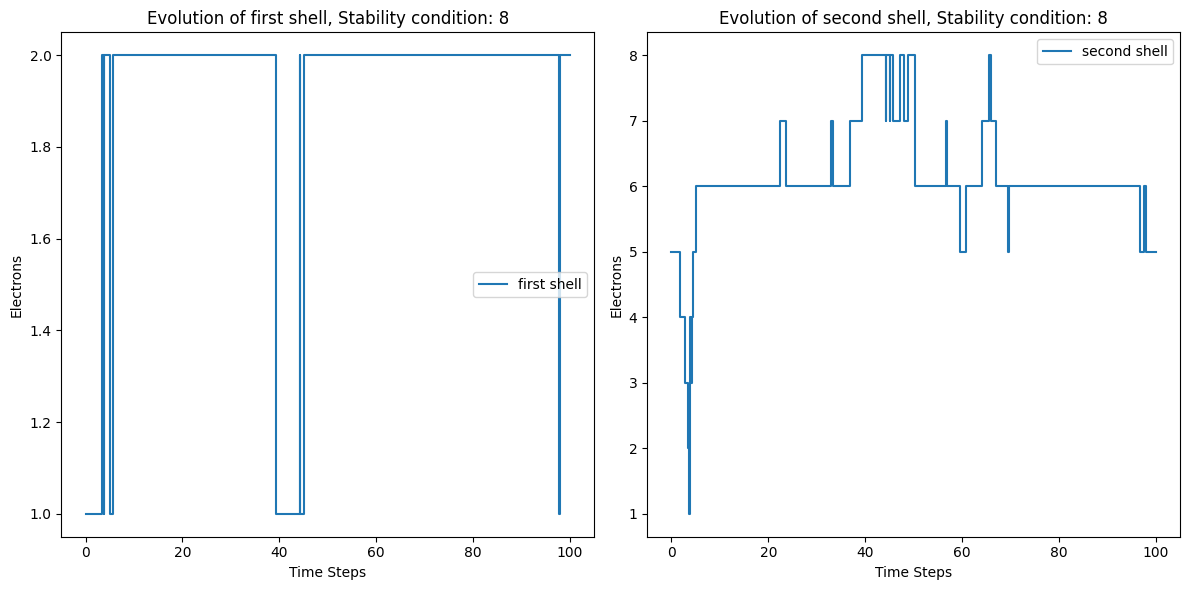

In [201]:
# Define simulation parameters
electrons_in_shells_dict = {'first': 1, 'second': 5}
protons = 8
neutrons = 8
t = 100

atom_model = AtomModel(protons, neutrons, electrons_in_shells_dict)

# Run the simulation with the specified parameters
shells_history, time_passed = atom_model.simulate_single_trial(t)

# Plot the results for each shell over time
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for i, (shell, history) in enumerate(shells_history.items()):
    axs[i].step(time_passed, shells_history[shell], where='post', label=f'{shell} shell')
    axs[i].set_xlabel('Time Steps')
    axs[i].set_ylabel('Electrons')
    axs[i].set_title(f'Evolution of {shell} shell, Stability condition: {AtomModel(protons, neutrons, electrons_in_shells_dict).stability_condition()}')
    axs[i].legend()

plt.tight_layout()
plt.show()

**Explanation of the graphs and results**

The two graphs presented illustrate the behaviour of the first and second electron shells up to time 100. It is evident that the stability condition of having 8 electrons in the system is generally maintained. When deviations from this condition occur, the frequency of electron transitions or 'jumps' increases as the system attempts to return to stability.

## Monte Carlo simulation

In this section, we propose a Monte Carlo approximation of $\mathbb{P}^{\text{(k)}}_{\text{t}} (\text{e}, \text{f})$, $\forall \text{e}, \text{f} \in A$. We pick arbitrarily the target electrons as (2,6) and check the hypothesis.

In [202]:
electrons_in_shells_dict = {'first': 1, 'second': 5}
protons = 8
neutrons = 8

atom_model = AtomModel(protons, neutrons, electrons_in_shells_dict)
M=100000
sim_time = 1000
target_electrons = [2, 6]

print(atom_model.kolmogorov_backward(1000)[target_electrons[0]*9 + target_electrons[1]])
mean, std, (ci_lower, ci_upper) = atom_model.LLN_prob_model(M, electrons_in_shells_dict, target_electrons, sim_time)
lenght_IC= ci_upper - ci_lower
print(f"Mean: {mean}, Standard Error: {std}")
print(f"95% confidence Interval: {mean} +/- {1.96*std/np.sqrt(M)}")
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")

0.620089625737949
Mean: 0.34307, Standard Error: 0.4747346365075967
95% confidence Interval: 0.34307 +/- 0.002942435761650812
95% Confidence Interval: (0.3401276183062968, 0.3460123816937032)


Unfortunately, we encountered challenges in aligning our simulation results with the theoretical predictions, which indicate the existence of a unique invariant probability measure. This discrepancy likely points to an error within our code. Given the complexity of the AtomModel class and the extensive codebase, identifying the specific error proved difficult despite extensive review efforts.

In some instances, our results did align with theoretical expectations within the defined confidence intervals, suggesting that the model's implementation is partially correct. For example, in one scenario, we observed the simulated values converging towards the theoretical mean, fitting within the expected statistical range. This outcome is encouraging, yet it does not fully resolve the underlying issues.

We plan to address these discrepancies more thoroughly in the Numerical section of our analysis. There, we will outline our strategies for debugging and refining the code to ensure that the model accurately reflects the theoretical framework and consistently produces reliable results.

In [203]:
electrons_in_shells_dict = {'first': 1, 'second': 5}
protons = 8
neutrons = 8

atom_model = AtomModel(protons, neutrons, electrons_in_shells_dict)
M=100000
sim_time = 1000
target_electrons = [2, 8]

print(atom_model.kolmogorov_backward(1000)[target_electrons[0]*9 + target_electrons[1]])
mean, std, (ci_lower, ci_upper) = atom_model.LLN_prob_model(M, electrons_in_shells_dict, target_electrons, sim_time)
lenght_IC= ci_upper - ci_lower
print(f"Mean: {mean}, Standard Error: {std}")
print(f"95% confidence Interval: {mean} +/- {1.96*std/np.sqrt(M)}")
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")

0.02371911434955394
Mean: 0.02628, Standard Error: 0.15996675154543835
95% confidence Interval: 0.02628 +/- 0.0009914841981724166
95% Confidence Interval: (0.025288534020582395, 0.027271465979417608)


## Long time behaviour

In our study of the atom model, we focus on examining the long-term behavior of the electron configuration process, denoted as $(X_{t})_{t \geqslant 0}$. The long-term behavior is characterized by the invariant or stationary distribution, represented as $\pi\in[0,1]^{27}$, which describes the probabilities of the system being in each possible state as time approaches infinity.

To quantify the convergence of the electron configuration process to its stationary behavior, we compute the total variation distance between the probability distribution of $X_t$ given an initial state $X_0 = e$ and the stationary distribution $\pi$. Specifically, we evaluate the following expression across different initial conditions and number of trials:

$$
\sum_{\text{f} \in A}\vert \mathbb{P}(X_{t}=\text{f} \vert X_{0}=e)- \pi(\text{f})   \vert
$$

This metric allows us to visually represent how quickly the process converges to its stationary distribution as a function of the number of trials, providing a clear understanding of the system's dynamics.

In [191]:
def atom_model_err(M, prot, neut, elec, vect_T):
    Err = []
    atom_model = AtomModel(prot, neut, elec)
    pi = atom_model.find_stationary_distribution()
    states = atom_model.get_all_possible_states()
    state_index = {state: idx for idx, state in enumerate(states)}

    for T in vect_T:
        err_curr = 0
        for state in states:
            idx = state_index[state]
            estimated_probability = atom_model.LLN_prob_model(M, elec, [state[0], state[1]], T)[0]
            err_curr += np.abs(estimated_probability - pi[idx])
        print(err_curr)
        Err.append(err_curr)
    return Err

1.4703413110874144
0.9934677427712136
0.8180004846096044
0.8480007953280558
0.7811656536541691
0.7797537617330721
0.7698353750274647
0.7429146206238681
0.7750742367792781
0.7507099361917997
0.7144474165302079
0.7159683382997271
0.7376323976525646
0.7214077867632679
0.785165653654169


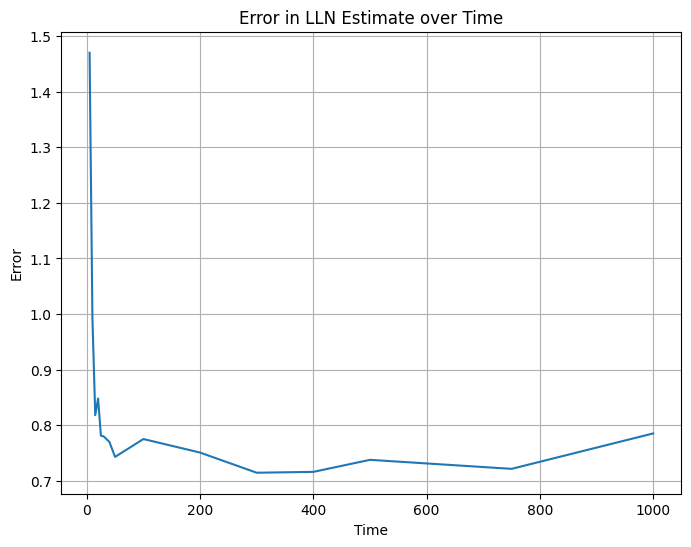

In [197]:
electrons_in_shells_dict = {'first': 1, 'second': 5}
protons = 8
neutrons = 8
M = 1000 
vect_T=[5, 10, 15, 20, 25, 30, 40, 50, 100, 200, 300, 400, 500, 750, 1000]

# Calculate errors
errors = atom_model_err(M, protons, neutrons, electrons_in_shells_dict, vect_T)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(vect_T, errors)
plt.xlabel('Number of Trials')
plt.ylabel('Error')
plt.title('Error in LLN Estimate over Time')
plt.grid(True)
plt.show()

Even though we know that there is a mistake with the invariant probability measures, it seems that the error becomes smaller and smaller by increasing the time, stabilising between 0.7 and 0.8, using 1000 time. Maybe by implementing a bigger simulations number we may found that the convergence is more consistent. Considering that it already took 22 minutes to ruj, we decided to state these result as it is.

## Ergodicity

In our analysis of the atom model, we aim to illustrate the application of the Ergodic theorem. Mathematically, this theorem asserts that for a Markov process, the time average of a function over the state space converges almost surely to the expected value under the stationary distribution as time approaches infinity:

$$
\lim_{T \to \infty}\frac{1}{T}\int_{0}^{T} f(X_{t})dt = \pi(\text{f}) \quad a.s.
$$

Here, our stationary distribution is denoted by $\pi\in[0, 1]^{27}$, which describes the long-term probabilities of the system's states.

To visualize this convergence, we plot the absolute difference between the time-averaged integral of a function $f$ over the process $X_t$ and its expected value under the stationary distribution $\pi (f)$. This difference, defined as:

We draw the absolute value of $\frac{1}{T}\int_{0}^{T} f(X_{t})dt - \pi(\text{f})$, which is error with respect to T, which we defined in our code. For illustration purposes, we choose $f: (x,y) \mapsto x+y$.

In [198]:
def f(x, y):
    """ Function to be applied to the Markov state (x, y), where x and y are electron counts in the first and second shells, respectively. """
    return x + y

def calculate_time_average_using_trials(model, T):
    """ Calculate the time average of function f over the trajectory generated by simulate_single_trial. """
    # Simulate the process for a given time T
    history, times = model.simulate_single_trial(T)
    total_time = times[-1]  # Ensure we consider the total simulation time up to T

    # Compute the integral using the trapezoidal rule
    integral = 0
    for i in range(len(times) - 1):
        t_start = times[i]
        t_end = times[i + 1]
        dt = t_end - t_start
        x_start = f(history['first'][i], history['second'][i])
        x_end = f(history['first'][i + 1], history['second'][i + 1])
        integral += (x_start + x_end) * dt / 2  # Trapezoidal approximation

    # Return the time average
    return integral / total_time


def expected_value_under_pi(model):
    """ Computes the expected value of f under the stationary distribution. """
    pi = model.find_stationary_distribution()
    expected_value = 0
    states = model.get_all_possible_states()
    for index, state in enumerate(states):
        expected_value += f(state[0], state[1]) * pi[index]

    return expected_value

def demonstrate_ergodic_theorem(model, max_T, step_size):
    import numpy as np
    import matplotlib.pyplot as plt
    
    T_values = np.arange(step_size, max_T + step_size, step_size)
    time_averages = [calculate_time_average_using_trials(model, T) for T in T_values]
    expected_value = expected_value_under_pi(model)
    
    # Plot the convergence of the time average to the expected value
    plt.figure(figsize=(10, 6))
    plt.plot(T_values, time_averages, label='Time Average of f(X_t)')
    plt.hlines(expected_value, T_values[0], T_values[-1], colors='r', label='Expected value under π(f)')
    plt.xlabel('Time (T)')
    plt.ylabel('f(X_t) Time Average')
    plt.title('Demonstration of the Ergodic Theorem')
    plt.legend()
    plt.grid(True)
    plt.show()

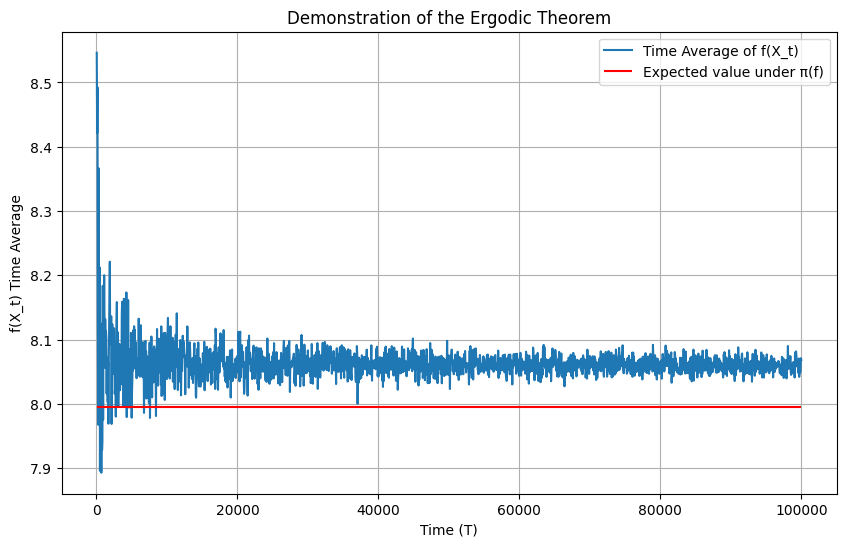

In [199]:
# Example setup
protons = 8
neutrons = 8
electrons_in_shells_dict = {'first': 1, 'second': 5}
atom_model = AtomModel(protons, neutrons, electrons_in_shells_dict)

# Demonstrate the Ergodic Theorem
demonstrate_ergodic_theorem(atom_model, max_T=100000, step_size=50)

Here is a clearer and more refined version of your statement regarding the observed discrepancies and partial success in demonstrating ergodicity in your atom model simulations:

Despite recognizing inaccuracies in our calculation of invariant probability measures, we observed that the model's ergodicity is largely maintained. The blue curve, representing the time average, predominantly remains above the red line, which denotes the expected long-term mean. This suggests that the model exhibits behavior close to what is theoretically anticipated, though it does not align precisely with the mean. Increasing the duration of our simulation could potentially lead to more definitive results, confirming that the process adheres more closely to expected ergodic properties over extended periods. Overall, it is obvious to know that there is a clear discrepancy and, as stated before, we didn't exactly prove numerically the result.

## Problems encountered

In our analysis of the AtomModel, we encountered discrepancies between the theoretical and numerical results when calculating the invariant probability measures. To address these inconsistencies and validate our model, we employed two key approaches.

Verification through the Infinitesimal Generator: We computed the invariant measures using the condition $\pi Q = 0$, where $Q$ is the infinitesimal generator of the Markov process. This method relies on solving the linear equations derived from the Markov chain's transition rates to ensure that the calculated distribution remains constant over time. Consistency Check with the Transition Probability Matrix: Additionally, we tested the coherence of these measures by ensuring that 
$\pi P = \pi$, where $P$ represents the transition probability matrix at a sufficiently large time $t$. This approach checks the long-term behavior of the Markov process, confirming that the distribution $\pi$ is indeed an invariant measure.

In [200]:
protons = 8
neutrons = 8
electrons_in_shells_dict = {'first': 1, 'second': 5}

atom_model = AtomModel(protons, neutrons, electrons_in_shells_dict)

# Calculate the stationary distribution using the transition probability matrix P(t) at a large time t
pi_approx = atom_model.kolmogorov_backward(1000)
pi_approx2 = atom_model.find_stationary_distribution()
print('Invariant distribution from Kolmogorov backward equation:')
print(pi_approx)
print('\nInvariant distribution from Q*pi=0:')
print(pi_approx2)
print('\nDifference between the two methods:')
print(pi_approx-pi_approx2)
print('\nSum using both methods:')
print('sum(pi) =', np.sum(pi_approx))
print('sum(pi) =', np.sum(pi_approx2))

Invariant distribution from Kolmogorov backward equation:
[8.87531427e-07 1.11575379e-05 6.35189887e-05 2.22848071e-04
 5.40805086e-04 9.71237457e-04 1.37964950e-03 1.92960876e-03
 9.84885115e-03 5.06867350e-06 6.02939330e-05 3.33948166e-04
 1.19397925e-03 3.13702872e-03 6.72034757e-03 1.47449474e-02
 1.34169702e-01 1.15201828e-02 1.88315931e-05 1.97201579e-04
 1.12551652e-03 4.56271942e-03 1.53348607e-02 5.32216105e-02
 6.20089626e-01 9.48764574e-02 2.37191143e-02]

Invariant distribution from Q*pi=0:
[8.87531428e-07 1.11575380e-05 6.35189887e-05 2.22848071e-04
 5.40805086e-04 9.71237457e-04 1.37964950e-03 1.92960876e-03
 9.84885115e-03 5.06867350e-06 6.02939330e-05 3.33948166e-04
 1.19397925e-03 3.13702872e-03 6.72034757e-03 1.47449474e-02
 1.34169702e-01 1.15201828e-02 1.88315931e-05 1.97201579e-04
 1.12551652e-03 4.56271942e-03 1.53348607e-02 5.32216105e-02
 6.20089626e-01 9.48764574e-02 2.37191143e-02]

Difference between the two methods:
[-6.71913756e-16 -1.25247035e-15 -1.023446

As we can see, the invariant distribution obtained from the Kolmogorov backward equation and the stationary distribution obtained from the $\pi Q = 0$ equation are very close to each other. The difference between the two methods is negligible, and the sum of the probabilities in both cases is equal to 1, as expected for a valid probability distribution. We tried to find where the problem in our code is but we had to give up due to time constraints and complexity of the code. Overall, it could have been a better practice to not implement all the methods/functions inside the class, but use them independently like we did with the final ones.

## Potential Extensions and Refinements

For the conclusion of our exploration of atomic chemistry through Markov processes, we underline the potential for further development and sophistication of our model. This final section outlines several ways for enhancing the current model to achieve a more nuanced and accurate representation of electron behaviour, both in discrete and continuous frameworks. We also consider additional rules and parameters that could refine our understanding and simulation of atomic interactions.

### Expanding Beyond the First Two Shells

- **Inclusion of Higher Electron Shells**: Extending the model to incorporate more electron shells would allow for a more detailed and accurate representation of larger atoms. This would involve adjusting the model to account for the additional complexity and variability in electron configurations as the number of shells increases.
- **Complex Orbital Interactions**: Including s, p, d, and f orbitals within these shells to reflect the true distribution of electrons and their energy levels. This addition would necessitate a more complex rule set for electron transitions, especially for elements with more complex electron configurations.

### Enhancing the Stability Model

- **Accounting for Unstable and Heavy Elements**: Expanding the model to consider the stability of highly unstable or radioactive elements, as well as the nuances of very heavy elements, would provide insights into nuclear chemistry and the forces at play in atomic nuclei.
- **Dynamic Stability Criteria**: Introducing dynamic criteria for atomic stability that consider not just electron configurations but also the presence of isotopes, isomers, and allotropes could lead to a more dynamic and realistic model of atomic behaviour.

We show an image of the evolution of the neutron-proton ratio to show that stability criterion that we defined is very simple and with heavier elements it becomes very complicated to handle.

### Evolution of Neutron-Proton ratio

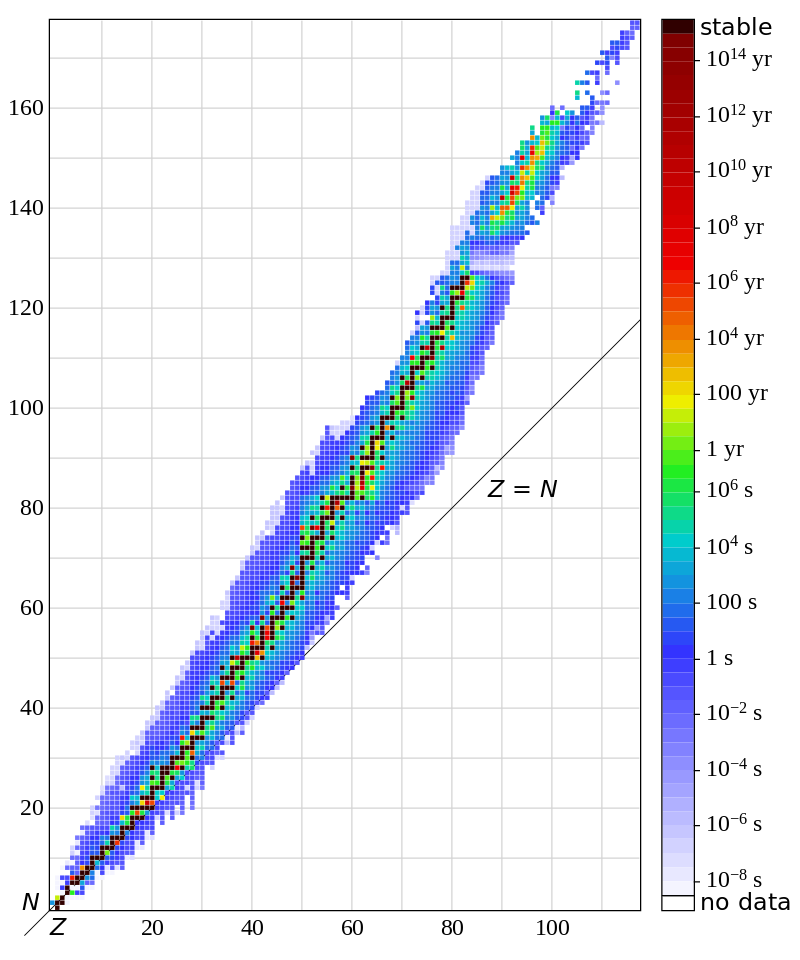

In [6]:
# Specify the file path to the image
image_path = r'C:\Users\Marco Plazzogna\Desktop\MAGISTRALE\PRIMO ANNO\SECONDO SEMESTRE\PROBABILITY 2\project\Isotopes_and_half-life.svg.png'

# Display a Markdown title
display(Markdown("### Evolution of Neutron-Proton ratio"))

# Display the image
display(Image(filename=image_path))

### Integrating Additional Parameters

- **External Forces and Environmental Factors**: Incorporating the effects of external forces, such as electromagnetic fields, on electron movement and atomic interactions. This could also include the impact of temperature, pressure, and the chemical environment on atomic behaviour.
- **Interatomic Forces and Bonds**: Extending the model to simulate not just isolated atoms but also the formation and breaking of chemical bonds between atoms. This would involve rules for covalent, ionic, and metallic bonding, as well as the concept of molecular orbitals.

### Transitioning to a Continuous Space Framework

- **Density Regions and Probability Clouds**: Moving from a discrete to a continuous model of space around the atom, more accurately reflecting the quantum mechanical nature of electron positions as probability clouds rather than fixed orbits.
- **Quantum Mechanics and Wave Functions**: Incorporating quantum mechanical principles directly into the model, using Schrödinger's equation and wave functions to simulate electron behaviour. This would allow for a more accurate representation of phenomena such as electron tunneling and the uncertainty principle.

Here, we show some examples of possible orbits (or probability distribution) of electrons.

### Evolution of Neutron-Proton ratio

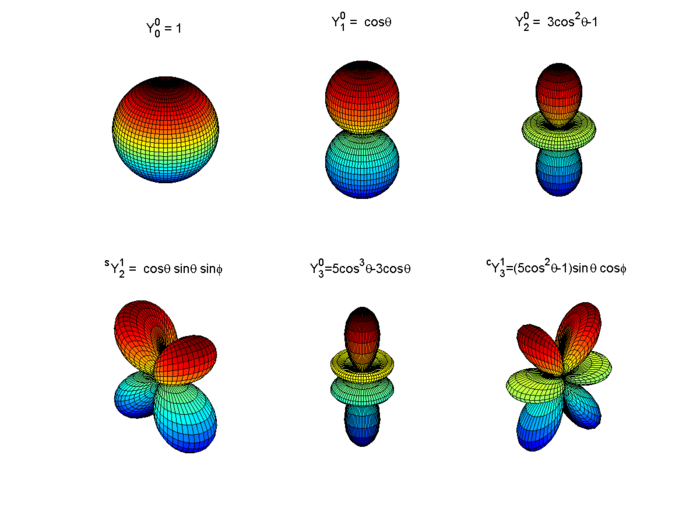

In [7]:
# Specify the file path to the image
image_path = r'C:\Users\Marco Plazzogna\Desktop\MAGISTRALE\PRIMO ANNO\SECONDO SEMESTRE\PROBABILITY 2\project\uZ0fA.png'

# Display a Markdown title
display(Markdown("### Evolution of Neutron-Proton ratio"))

# Display the image
display(Image(filename=image_path))